data from https://www.cbr.ru/currency_base/dynamics/

In [1]:
import pandas as pd

In [5]:
df = pd.read_excel('RC_F01_01_2017_T15_06_2020.xlsx')

In [6]:
df.head()

,nominal,data,curs,cdx
0,1,2017-01-10,59.8961,Доллар США
1,1,2017-01-11,59.9533,Доллар США
2,1,2017-01-12,60.1614,Доллар США
3,1,2017-01-13,59.4978,Доллар США
4,1,2017-01-14,59.3700,Доллар США


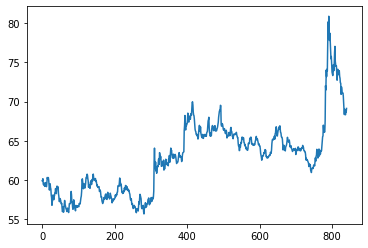

In [7]:
df.curs.plot()

In [8]:
df.curs[100:128]

100    56.6747
101    56.5878
102    56.9857
103    57.0020
104    56.9096
105    57.0303
106    57.4437
107    57.7408
108    57.9585
109    58.5786
110    60.0000
111    60.1482
112    59.6564
113    59.0014
114    58.8843
115    59.5415
116    59.0855
117    59.3862
118    58.9695
119    59.2295
120    59.5787
121    60.2426
122    60.3792
123    60.3014
124    60.7397
125    60.6227
126    60.1836
127    59.8806
Name: curs, dtype: float64

In [10]:
df.curs[128:135]

128    59.0657
129    59.3705
130    59.2418
131    59.0823
132    58.9325
133    59.6572
134    59.8185
Name: curs, dtype: float64

In [11]:
past = 28
future = 7

In [17]:
start = past
finish = len(df) - future

In [21]:
dt = []
for day in range(start, finish):
    d_past = list(df.curs[day - 28 : day])
    d_future = list(df.curs[day : day + future])
    dt.append(d_past + d_future)

In [26]:
p_columns = []
for i in range(past):
    p_columns.append(f'p_{i}')
    
f_columns = []
for i in range(future):
    f_columns.append(f'f_{i}')

data = pd.DataFrame(dt, columns=p_columns + f_columns)

In [27]:
data

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_25,p_26,p_27,f_0,f_1,f_2,f_3,f_4,f_5,f_6
0,59.8961,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,...,58.0619,57.7388,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627
1,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,...,57.7388,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776
2,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,...,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067
3,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,...,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067,58.9099
4,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,...,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067,58.9099,58.3370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,73.5245,73.3150,73.7145,74.7119,73.9441,74.6657,76.2562,77.0416,75.1290,74.7163,...,71.8804,71.5962,71.1408,71.0635,71.1012,70.7520,69.7114,68.9831,68.3413,69.0151
802,73.3150,73.7145,74.7119,73.9441,74.6657,76.2562,77.0416,75.1290,74.7163,74.4960,...,71.5962,71.1408,71.0635,71.1012,70.7520,69.7114,68.9831,68.3413,69.0151,68.6319
803,73.7145,74.7119,73.9441,74.6657,76.2562,77.0416,75.1290,74.7163,74.4960,74.5706,...,71.1408,71.0635,71.1012,70.7520,69.7114,68.9831,68.3413,69.0151,68.6319,68.3123
804,74.7119,73.9441,74.6657,76.2562,77.0416,75.1290,74.7163,74.4960,74.5706,73.6894,...,71.0635,71.1012,70.7520,69.7114,68.9831,68.3413,69.0151,68.6319,68.3123,68.6745


входные / выходные данные

In [35]:
X = data[p_columns]
Y = data[f_columns]

In [36]:
X_train = X[:-10]
Y_train = Y[:-10]

In [37]:
X_test = X[-10:]
Y_test = Y[-10:]

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
X_test.head(1)

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_18,p_19,p_20,p_21,p_22,p_23,p_24,p_25,p_26,p_27
796,76.4074,75.455,75.7499,74.605,73.7515,73.5245,73.315,73.7145,74.7119,73.9441,...,72.7263,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918


In [42]:
X_test.iloc[6]

p_0     73.3150
p_1     73.7145
p_2     74.7119
p_3     73.9441
p_4     74.6657
p_5     76.2562
p_6     77.0416
p_7     75.1290
p_8     74.7163
p_9     74.4960
p_10    74.5706
p_11    73.6894
p_12    72.7263
p_13    73.9719
p_14    74.1169
p_15    73.8725
p_16    73.4326
p_17    73.5819
p_18    73.9298
p_19    73.2056
p_20    72.9798
p_21    72.3918
p_22    72.3381
p_23    70.9240
p_24    71.8804
p_25    71.5962
p_26    71.1408
p_27    71.0635
Name: 802, dtype: float64

In [43]:
lr.predict(X_test)

array([[72.57917548, 72.43527824, 72.26025882, 72.03551262, 72.04576646,
        71.97203138, 71.88417827],
       [72.18550291, 71.92159778, 71.67426162, 71.75659663, 71.706465  ,
        71.66853235, 71.44631133],
       [70.61985173, 70.34184485, 70.42608118, 70.36760907, 70.23898035,
        70.03695771, 69.85475155],
       [71.65006833, 71.64503773, 71.58151084, 71.55241162, 71.48136966,
        71.35217543, 71.27298406],
       [71.58758099, 71.44396544, 71.37853394, 71.38670893, 71.30248882,
        71.2699675 , 71.21592718],
       [70.97649983, 70.84771175, 70.85503827, 70.80156072, 70.75229239,
        70.72237949, 70.70577455],
       [70.93748611, 70.85781891, 70.84230353, 70.82940903, 70.80610471,
        70.82412674, 70.60776024],
       [71.02589963, 71.02000098, 71.01556829, 70.98272867, 71.00451603,
        70.77924068, 70.57494146],
       [70.73984986, 70.85233779, 70.78065195, 70.74308686, 70.48875507,
        70.23948926, 70.4656301 ],
       [69.79187348, 69.6478

In [44]:
Y_test.head(1)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6
796,72.3381,70.924,71.8804,71.5962,71.1408,71.0635,71.1012


In [45]:
day_1 = X_test.head(1)

In [46]:
day_1r = Y_test.head(1)

In [52]:
day_pr = lr.predict(day_1)
day_pr

array([[72.57917548, 72.43527824, 72.26025882, 72.03551262, 72.04576646,
        71.97203138, 71.88417827]])

In [48]:
day_1r

,f_0,f_1,f_2,f_3,f_4,f_5,f_6
796,72.3381,70.924,71.8804,71.5962,71.1408,71.0635,71.1012


In [49]:
from sklearn.metrics import mean_absolute_error

In [53]:
mean_absolute_error(day_pr[0], day_1r.iloc[0])

0.7382858976275202

In [54]:
import matplotlib.pyplot as plt

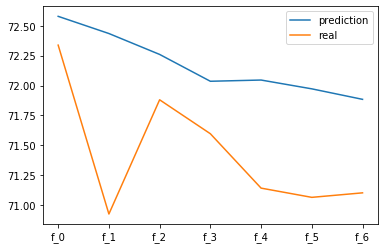

In [55]:
plt.plot(day_pr[0], label = 'prediction')
plt.plot(day_1r.iloc[0], label='real')
plt.legend()

In [58]:
pr = lr.predict([X_test.iloc[1]])
real = Y_test.iloc[1]
mean_absolute_error(pr[0], real)

0.5573096584181627

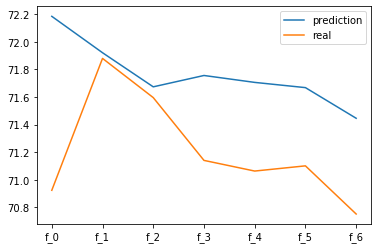

In [59]:
plt.plot(pr[0], label = 'prediction')
plt.plot(real, label='real')
plt.legend()

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [64]:
pr = knr.predict([X_test.iloc[1]])
real = Y_test.iloc[1]
mean_absolute_error(pr[0], real)

0.9889085714285711

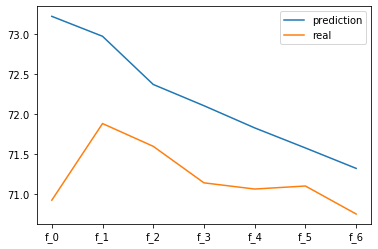

In [65]:
plt.plot(pr[0], label = 'prediction')
plt.plot(real, label='real')
plt.legend()

In [66]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [67]:
pr = knr.predict([X_test.iloc[1]])
real = Y_test.iloc[1]
mean_absolute_error(pr[0], real)

0.5478357142857107

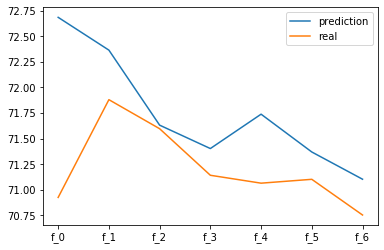

In [68]:
plt.plot(pr[0], label = 'prediction')
plt.plot(real, label='real')
plt.legend()

In [73]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()

In [74]:
mlp.fit(X_train, Y_train)

l:\python\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [75]:
pr = mlp.predict([X_test.iloc[1]])
real = Y_test.iloc[1]
mean_absolute_error(pr[0], real)

2.3483056602084957

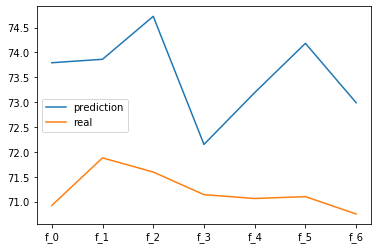

In [76]:
plt.plot(pr[0], label = 'prediction')
plt.plot(real, label='real')
plt.legend()

In [86]:
mlp = MLPRegressor(max_iter=1000, hidden_layer_sizes=(150,150,150))

In [87]:
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(150, 150, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [88]:
pr = mlp.predict([X_test.iloc[1]])
real = Y_test.iloc[1]
mean_absolute_error(pr[0], real)

1.5087113912212422

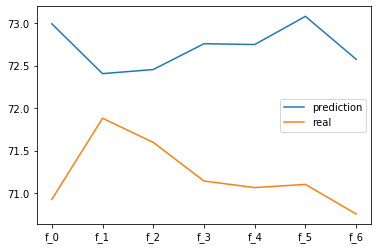

In [89]:
plt.plot(pr[0], label = 'prediction')
plt.plot(real, label='real')
plt.legend()